In [7]:
import pandas as pd
import time, datetime, tqdm
import matplotlib.pyplot as plt
import numpy as np
import pickle
import utils, plots, tools
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.style.use("style.mplstyle")

In [36]:
path_to_save_plots = "/eos/user/j/jcapotor/DUNE-IFIC/Publications/ProtoDUNE-HD TMS performance/filling/"

tini = datetime.datetime(2024, 3, 1, 0, 0, 0)
tend = datetime.datetime(2024, 5, 1, 0, 0, 0)
data, data_err = utils.load_data(
    tini=tini,
    tend=tend
)

mapping = utils.load_mapping(date=datetime.datetime(2024, 4, 1, 0, 0, 0))

# Filling: Valencia T-Gradient

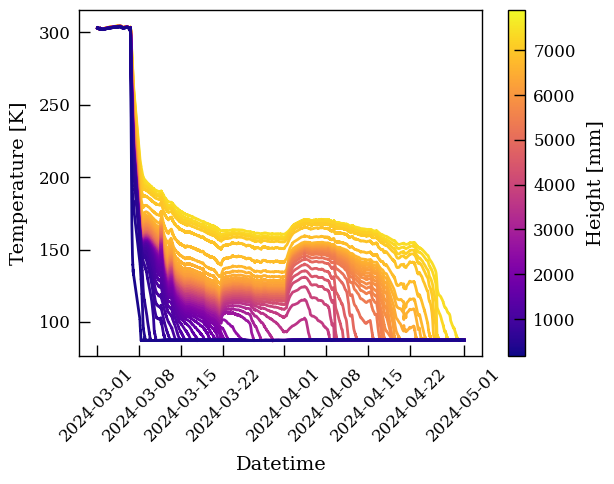

In [40]:
fig, axes = plt.subplots(1, 1)  # Adjust figure size if needed

# Define colormap and normalize based on Y values
cmap = plt.cm.plasma
y_values = mapping["Y"].values
norm = plt.Normalize(vmin=min(y_values), vmax=max(y_values))  # Normalize based on actual heights

for index, row in mapping.iterrows():
    if row["SYSTEM"] != "TGRAD":
        continue
    height = row["Y"]  # Use actual height for color mapping
    axes.plot(data.index.to_numpy(), data[row["SC-ID"]].to_numpy(),
              color=cmap(norm(height)), label=f"{height:.2f}")  # Optional: format height

# Add colorbar with proper mapping
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=axes)
cbar.set_label("Height [mm]")

# Set labels and formatting
axes.set_xlabel("Datetime")
axes.set_ylabel("Temperature [K]")
plt.xticks(rotation=45)
plt.show()
fig.savefig("/eos/user/j/jcapotor/DUNE-IFIC/Experiments/ProtoDUNE-HD/Operation/Plots/filling/tgrad_temperature_vs_time.png", format="png")


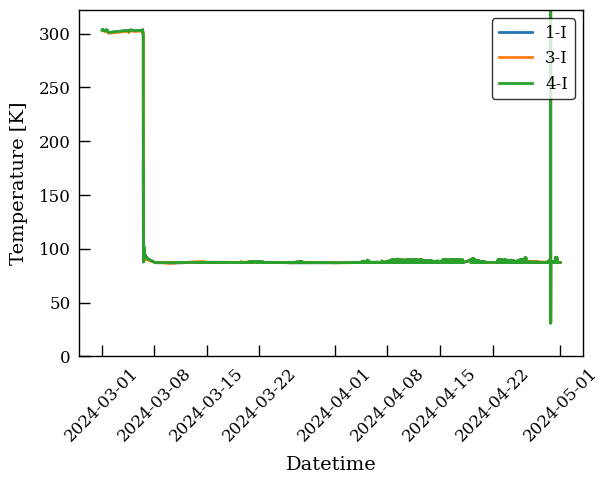

In [52]:
fig, axes = plt.subplots(1, 1)  # Adjust figure size if needed

for index, row in mapping.iterrows():
    if row["SYSTEM"] != "PIPE":
        continue
    if "I" not in row["NAME"]:
        continue
    if "2" in row["NAME"]:
        continue
    height = row["Y"]  # Use actual height for color mapping
    axes.plot(data.index.to_numpy(), data[row["SC-ID"]].to_numpy(), label=f'{row["NAME"]}')

# Set labels and formatting
axes.set_xlabel("Datetime")
axes.set_ylabel("Temperature [K]")
axes.set_ylim(0, 322)
axes.legend(loc="upper right")
plt.xticks(rotation=45);
# fig.savefig("/eos/user/j/jcapotor/DUNE-IFIC/Experiments/ProtoDUNE-HD/Operation/Plots/filling/tgrad_temperature_vs_time.png", format="png")